In [277]:
from casacore.tables import table
import numpy as np
import pylab
from astropy.coordinates import FK5
from astropy.coordinates import SkyCoord
from astropy.io import fits
%matplotlib notebook

In [278]:
msname="/home/lofar/Desktop/Hrishi/0_StartingWithLOFARData/test.ms"
specname="/home/lofar/Desktop/Hrishi/0_StartingWithLOFARData/test.ms/SPECTRAL_WINDOW"
ms=table(msname,readonly=True)
spec_data = table(specname,readonly=True)

Successful readonly open of default-locked table /home/lofar/Desktop/Hrishi/0_StartingWithLOFARData/test.ms: 27 columns, 845277 rows
Successful readonly open of default-locked table /home/lofar/Desktop/Hrishi/0_StartingWithLOFARData/test.ms/SPECTRAL_WINDOW: 14 columns, 1 rows


In [279]:
c = 299_792_458 #units: m/s. Speed of light taken in vacuum. Changes for air??

In [280]:
spec_data.colnames()

['MEAS_FREQ_REF',
 'REF_FREQUENCY',
 'FLAG_ROW',
 'FREQ_GROUP',
 'FREQ_GROUP_NAME',
 'IF_CONV_CHAIN',
 'NAME',
 'NET_SIDEBAND',
 'NUM_CHAN',
 'TOTAL_BANDWIDTH',
 'CHAN_FREQ',
 'CHAN_WIDTH',
 'EFFECTIVE_BW',
 'RESOLUTION']

In [281]:
u_dist,v_dist,_=ms.getcol("UVW").T
print(u_dist.shape)
print(v_dist)

(845277,)
[3.68190721e+00 2.29629543e+02 2.51203697e+02 ... 2.13763964e+04
 4.23246024e+04 2.09482060e+04]


In [282]:
u_dist_2d = np.transpose(([u_dist]*spec_data.getcol("CHAN_FREQ")[0].shape[0]))
v_dist_2d = np.transpose(([v_dist]*spec_data.getcol("CHAN_FREQ")[0].shape[0]))

U_all_freqs = (u_dist_2d*(spec_data.getcol("CHAN_FREQ")[0]/c))
V_all_freqs = (v_dist_2d*(spec_data.getcol("CHAN_FREQ")[0]/c))

In [283]:
V_all_freqs.shape

(845277, 20)

In [284]:
# %matplotlib inline
# pylab.figure(figsize=(8,8))
# pylab.title("Complete UV tracks")
# pylab.scatter(U_all_freqs,V_all_freqs,s=0.001)
# pylab.scatter(-U_all_freqs,-V_all_freqs,s=0.001)

In [285]:
source_coordinates = SkyCoord("exit", frame=FK5)
phasecenter_ra = np.deg2rad(185.285)   
phasecenter_dec = np.deg2rad(47.492)
new_ra = np.deg2rad(source_coordinates.ra.deg)   
new_dec =  np.deg2rad(source_coordinates.dec.deg)
delta_ra = new_ra - phasecenter_ra
delta_dec = new_dec - phasecenter_dec
l = np.cos(new_dec)*np.sin(delta_ra)
m = np.sin(new_dec)*np.cos(phasecenter_dec)-np.cos(new_dec)*np.sin(phasecenter_dec)*np.cos(delta_ra)
#m = np.sin(new_dec)
print(f"l={l} and m={m}")

l=-0.009188073467300524 and m=0.006876402635905832


In [286]:
np.array([[new_ra, new_dec]]).shape

(1, 2)

In [287]:
# read corrected data column
corrected_data = ms.getcol("CORRECTED_DATA")
corrected_data.shape

(845277, 20, 4)

In [288]:
corrected_data_complex = np.exp(2*np.pi*(l*U_all_freqs+m*V_all_freqs)*1j)

In [289]:
corrected_data_complex.shape

(845277, 20)

In [290]:
data_with_polarization = np.repeat(corrected_data_complex[:, :, np.newaxis], 4, axis = 2)
data_with_polarization[:,:,1:3] = 0
data_with_polarization.shape

(845277, 20, 4)

In [291]:
data_with_polarization[:,10,0]

array([-0.91952497+0.39303159j, -0.9114334 -0.41144763j,
       -0.99731887+0.0731783j , ...,  0.25321699-0.96740951j,
        0.10949795+0.99398702j, -0.93386575+0.35762377j])

In [292]:
ms.close()

In [293]:
msname="/home/lofar/Desktop/Hrishi/0_StartingWithLOFARData/test.ms"
ms=table(msname,readonly=False)

Successful read/write open of default-locked table /home/lofar/Desktop/Hrishi/0_StartingWithLOFARData/test.ms: 27 columns, 845277 rows


In [294]:
ms.putcol("CORRECTED_DATA", data_with_polarization)

In [295]:
ms.close()

In [273]:
%ls -ltr

total 33448
drwxrwxr-x 21 lofar lofar    4096 Apr  4 13:17 test_backup.ms/
-rw-rw-r--  1 lofar lofar 3245760 Apr  4 15:41 0_PointSorceAtPhaseCenter-noise-dirty.fits
-rw-rw-r--  1 lofar lofar 3245760 Apr  4 15:41 0_PointSorceAtPhaseCenter-noise-image.fits
drwxrwxr-x 21 lofar lofar    4096 Apr  5 15:09 test.ms/
-rw-rw-r--  1 lofar lofar 1463220 Apr  8 14:14 0_PointSourceAtPhaseCenter.ipynb
-rw-rw-r--  1 lofar lofar   11992 Apr  8 14:24 1_PointSourceNotAtPhaseCenter.ipynb
-rw-rw-r--  1 lofar lofar 3245760 Apr 13 14:11 0_PointSorceAtPhaseCenter-dirty.fits
-rw-rw-r--  1 lofar lofar 3245760 Apr 13 14:11 0_PointSorceAtPhaseCenter-image.fits
-rw-rw-r--  1 lofar lofar 3245760 Apr 13 16:18 1_PointSourceNotAtPhaseCenter-dirty.fits
-rw-rw-r--  1 lofar lofar 3245760 Apr 13 16:18 1_PointSourceNotAtPhaseCenter-image.fits
-rw-rw-r--  1 lofar lofar 3245760 Apr 13 16:37 3_PointSourceAtGivenRADec-dirty.fits
-rw-rw-r--  1 lofar lofar 3245760 Apr 13 16:37 3_PointSourceAtGivenRADec-image.fits
-rw-rw-r--  1 

In [21]:
msname="/home/lofar/Desktop/Hrishi/0_StartingWithLOFARData/test.ms"
ms=table(msname,readonly=True)
ms.getcol("CORRECTED_DATA")[:,0,0]

Successful readonly open of default-locked table /home/lofar/Desktop/Hrishi/0_StartingWithLOFARData/test.ms: 27 columns, 845277 rows


array([1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
      dtype=complex64)

In [143]:
image_name =  "/home/lofar/Desktop/Hrishi/0_StartingWithLOFARData/3_PointSourceAtGivenRADec-image.fits"
dirty_image_name =  "/home/lofar/Desktop/Hrishi/0_StartingWithLOFARData/3_PointSourceAtGivenRADec-dirty.fits"

In [144]:
image = fits.open(image_name)[0].data[0,0]
dirty = fits.open(dirty_image_name)[0].data[0,0]

<IPython.core.display.Javascript object>


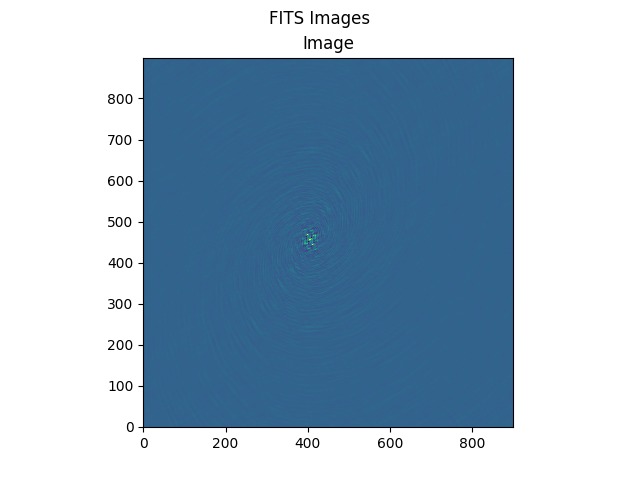

In [145]:
%matplotlib notebook
pylab.suptitle("FITS Images")
pylab.title("Image")
pylab.imshow(image, vmin = 0.1*np.min(image), vmax= 0.1*np.max(image), origin="lower")


In [27]:
#image-dirty

In [28]:
grid_size = 100
uv_plane = np.zeros((grid_size,grid_size))

In [ ]:
uv_plane.shape

In [127]:
grid = np.zeros((grid_size,grid_size,2))
half_grid_size = int(grid_size/2)
grid[:,:, 0] = np.repeat(np.linspace(-half_grid_size+1, half_grid_size, grid_size)[:, np.newaxis],grid_size, axis = 1).T
grid[:,:, 1] = np.repeat(np.linspace(half_grid_size, -half_grid_size+1, grid_size)[:, np.newaxis],grid_size, axis = 1)

In [128]:
uv_plane = np.cos(-0.2*np.pi*(grid[:,:, 0] + grid[:,:, 1])) + np.sin(-0.2*np.pi*(grid[:,:, 1] + grid[:,:, 0]))